# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

Name of my dataset: Customer Personality Analysis, 
Link to my dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [36]:
# Importing the appropriate libraries with aliases
import numpy as np 
import pandas as pd 
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

# Creating a dataframe:
data = pd.read_csv('marketing_campaign.csv')


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [53]:
# Checking what is in the dataframe (displaying top 20 rows):
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,Total_transactions,Spent,online-ratio
0,5524,1957,Graduation,Alone,58138.0,0,0,4/9/2012,58,635,...,0,0,3,11,1,66,High,22,1617,0.363636
1,2174,1954,Graduation,Alone,46344.0,1,1,8/3/2014,38,11,...,0,0,3,11,0,69,High,4,27,0.250000
2,4141,1965,Graduation,Not Alone,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,58,High,20,776,0.400000
3,6182,1984,Graduation,Not Alone,26646.0,1,0,10/2/2014,26,11,...,0,0,3,11,0,39,High,6,53,0.333333
4,5324,1981,PhD,Not Alone,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,42,High,14,422,0.357143
5,7446,1967,Master,Not Alone,62513.0,0,1,9/9/2013,16,520,...,0,0,3,11,0,56,High,20,716,0.300000
6,965,1971,Graduation,Alone,55635.0,0,1,13-11-2012,34,235,...,0,0,3,11,0,52,High,17,590,0.411765
7,6177,1985,PhD,Not Alone,33454.0,1,0,8/5/2013,32,76,...,0,0,3,11,0,38,High,8,169,0.500000
8,4855,1974,PhD,Not Alone,30351.0,1,0,6/6/2013,19,14,...,0,0,3,11,1,49,High,5,46,0.600000
9,5899,1950,PhD,Not Alone,5648.0,1,1,13-03-2014,68,28,...,0,0,3,11,0,73,High,1,49,1.000000


In [38]:
#Checking the unique education status of all customers:

unique_edu = data['Education'].drop_duplicates()
print(unique_edu)

0     Graduation
4            PhD
5         Master
11         Basic
19      2n Cycle
Name: Education, dtype: object


In [39]:
#Checking the null values:

data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [40]:
#Filling the null values with median value:

data['Income']=data['Income'].fillna(data['Income'].median())
print(f'NULL values: {data["Income"].isnull().sum()}')

NULL values: 0


In [41]:
# Identifying the age of all customers:
data['Age'] = datetime.now().year - data['Year_Birth']
data['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [42]:
# Identifying customers older than 82:
data.query('Age>82')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,123
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,130
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,124
1950,6663,1940,PhD,Single,51141.0,0,0,8/7/2013,96,144,...,0,0,0,0,0,0,3,11,0,83


In [60]:
# Education level will be segmented into 3 categories only for better segmentaion:

#def Education_level(Education):
#    if Education in ['Graduation', 'PhD', 'Master']:
#        return 'High'
#   elif Education in ['Basic']:
#       return 'Middle'
#   else:
#       return 'Low'

# Education level will be segmented into 4 categories only for better segmentaion:
    
def Education_level(Education):
    if Education in ['PhD']:
        return 'PhD'
    elif Education in ['2n Cycle', 'Master']:
        return 'Master'
    elif Education in ['Graduation']:
        return 'UnderGraduate'
    else:
        return 'High School'

data['Education_Level'] = data['Education'].apply(Education_level)

In [44]:
#Marital Status will be segmented into two categories only (alone,not alone):
data['Marital_Status'] = data['Marital_Status'].replace({'Alone':'Alone', 'Absurd':'Alone','YOLO':'Alone','Single':'Alone','Divorced':'Alone','Widow':'Alone','Married':'Not Alone','Together':'Not Alone'})

In [45]:
#Total transactions:
data['Total_transactions'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [54]:
#Total spent by customers:
data['Spent'] = data[['MntFruits','MntMeatProducts',"MntWines",'MntFishProducts','MntSweetProducts',
                      'MntGoldProds']].sum(axis=1)

In [47]:
#Online sales  ratio:
data['online-ratio'] = data['NumWebPurchases'] / (data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'])

In [48]:
#Total transactions:
data['Total_transactions'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

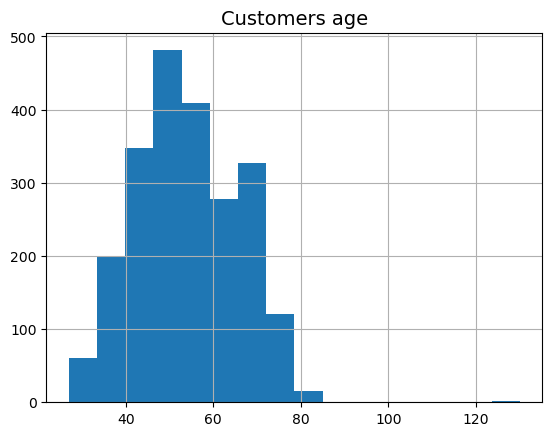

In [49]:
# Visualizing customers by their age:
data.Age.hist(bins=16)
plt.title('Customers age', fontsize=14)
plt.show()

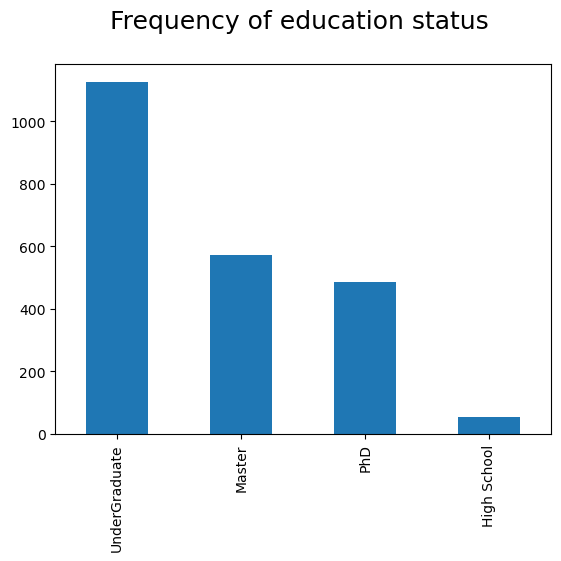

In [61]:
#Visualizing the level of education of all customers:

data['Education_Level'].value_counts().plot(kind='bar',linewidth = 3)
plt.title("Frequency of education status \n",fontsize=18)
# plt.grid(True)
plt.show()

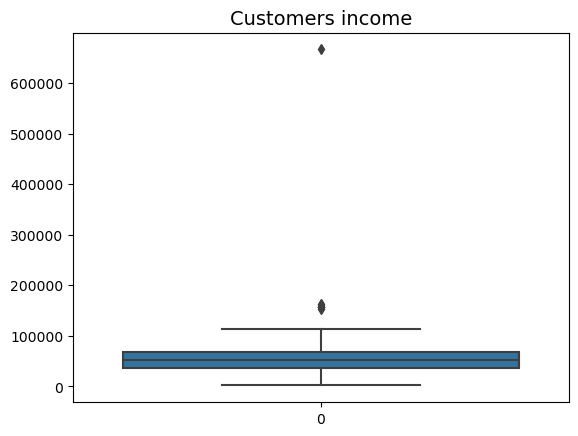

In [55]:
#Customer income
sns.boxplot(data.Income)
plt.title('Customers income', fontsize=14)
plt.show()

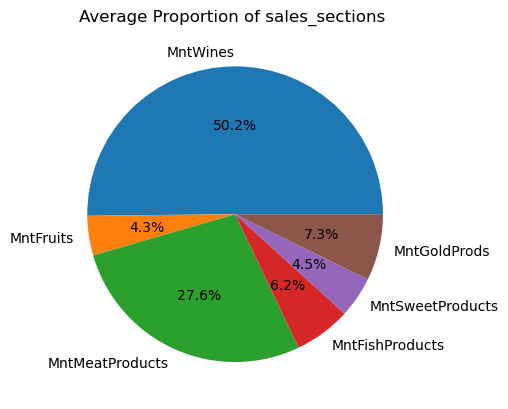

In [51]:
#Visualizing the proportion of sales by product categories:

sales_sections = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
totals = data[sales_sections].sum()
average_proportions = totals / data['Spent'].sum()

fig, ax = plt.subplots()
ax.pie(average_proportions, labels=sales_sections,autopct='%1.1f%%')
plt.title('Average Proportion of sales_sections ')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'UnderGraduate'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'High School')])

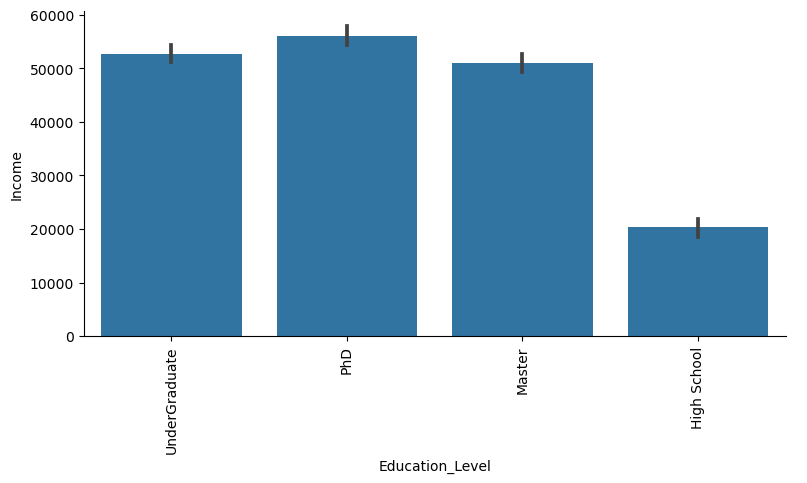

In [62]:
g = sns.FacetGrid(data ,aspect=2 ,height=4)
g.map(sns.barplot,"Education_Level","Income")
g.add_legend()
plt.xticks(rotation='vertical')

In [66]:
#Store purchases by marital status:
fig_3 = px.bar(data, x="Age", y="NumStorePurchases",color='Marital_Status')
fig_3.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

In [52]:
1. Was there anything surprising about your dataset? 
I was surprised to see that the amount of alcohol sold (50.2%) exceeds the amount of food sold. 

2. Do you have any concerns about your dataset?
The dataset looks good and fun to work with. 

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
I have performed some cleaning in this stage, including filling the null values in the 'Income' field with the median value. 
In the next stage, I will check for duplicates, outliers, incomplete data, and other issues.

SyntaxError: invalid syntax (2235122020.py, line 1)